# Random Forest Classification for drug200 Dataset

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('drug200.csv')

## Checking for null cells

In [3]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Replacing categorical values of Sex column by dummy variables (Because it is independent category i.e. No one is higher or lower)

In [5]:
# making dummies
dummy_variable_sex = pd.get_dummies(data["Sex"])
# Concatenate
data = pd.concat([data, dummy_variable_sex], axis=1)
# Drop sex column
data.drop("Sex", axis = 1, inplace=True)

In [6]:
data

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,1,0
196,16,LOW,HIGH,12.006,drugC,0,1
197,52,NORMAL,HIGH,9.894,drugX,0,1
198,23,NORMAL,NORMAL,14.020,drugX,0,1


## Extracting target variable

In [7]:
y = data.iloc[:, -3].values
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [8]:
# Dropping Drug column
dataset = data.drop("Drug", axis = 1, inplace=False)

In [9]:
print(dataset)

     Age      BP Cholesterol  Na_to_K  F  M
0     23    HIGH        HIGH   25.355  1  0
1     47     LOW        HIGH   13.093  0  1
2     47     LOW        HIGH   10.114  0  1
3     28  NORMAL        HIGH    7.798  1  0
4     61     LOW        HIGH   18.043  1  0
..   ...     ...         ...      ... .. ..
195   56     LOW        HIGH   11.567  1  0
196   16     LOW        HIGH   12.006  0  1
197   52  NORMAL        HIGH    9.894  0  1
198   23  NORMAL      NORMAL   14.020  0  1
199   40     LOW      NORMAL   11.349  1  0

[200 rows x 6 columns]


## Replacing categorical values of BP and Cholesterol column by Label encoder (Because this is dependent ie higher and lower)

In [10]:
# Converting dataframe into arrays
dataset_array = dataset.values
dataset_array

array([[23, 'HIGH', 'HIGH', 25.355, 1, 0],
       [47, 'LOW', 'HIGH', 13.093, 0, 1],
       [47, 'LOW', 'HIGH', 10.113999999999999, 0, 1],
       ...,
       [52, 'NORMAL', 'HIGH', 9.894, 0, 1],
       [23, 'NORMAL', 'NORMAL', 14.02, 0, 1],
       [40, 'LOW', 'NORMAL', 11.349, 1, 0]], dtype=object)

In [11]:
# Using sklearn library's LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,1] = le_BP.transform(dataset_array[:,1])
dataset_array

array([[23, 0, 'HIGH', 25.355, 1, 0],
       [47, 1, 'HIGH', 13.093, 0, 1],
       [47, 1, 'HIGH', 10.113999999999999, 0, 1],
       ...,
       [52, 2, 'HIGH', 9.894, 0, 1],
       [23, 2, 'NORMAL', 14.02, 0, 1],
       [40, 1, 'NORMAL', 11.349, 1, 0]], dtype=object)

In [12]:
# Using sklearn library's LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le_Chole = LabelEncoder()
le_Chole.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,2] = le_Chole.transform(dataset_array[:,2])
X = dataset_array


## Splitting the dataset into the Train set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
print(X_train)

[[28 2 0 19.675 1 0]
 [53 0 2 12.495 1 0]
 [18 0 0 37.188 1 0]
 [56 0 0 25.395 1 0]
 [22 1 0 8.151 0 1]
 [33 1 0 33.486 1 0]
 [18 2 2 8.75 1 0]
 [30 2 0 10.443 1 0]
 [73 2 0 19.221 1 0]
 [65 0 2 11.34 0 1]
 [52 1 2 32.922 0 1]
 [58 1 0 38.247 1 0]
 [59 2 0 13.884 1 0]
 [32 0 2 25.974 1 0]
 [72 1 2 14.642000000000001 1 0]
 [29 0 0 29.45 1 0]
 [68 0 2 10.189 1 0]
 [21 0 2 28.631999999999998 1 0]
 [67 2 2 10.898 0 1]
 [51 2 0 13.597000000000001 1 0]
 [69 2 0 10.065 1 0]
 [62 2 0 16.594 0 1]
 [35 0 0 12.894 1 0]
 [45 0 0 12.854000000000001 1 0]
 [39 0 0 9.664 0 1]
 [50 2 2 17.211 1 0]
 [23 2 0 16.85 0 1]
 [50 2 0 12.703 1 0]
 [49 2 2 9.381 1 0]
 [64 1 2 25.741 1 0]
 [47 0 0 10.402999999999999 0 1]
 [37 0 0 13.091 1 0]
 [51 0 2 11.343 0 1]
 [56 1 0 11.567 1 0]
 [72 0 2 9.677 0 1]
 [67 1 2 20.693 0 1]
 [47 1 0 10.113999999999999 0 1]
 [34 0 0 18.703 0 1]
 [55 0 0 10.977 1 0]
 [52 2 0 9.894 0 1]
 [23 2 0 12.26 0 1]
 [47 1 0 11.767000000000001 1 0]
 [46 0 0 34.686 1 0]
 [41 2 2 22.905 1 0]
 [1

In [15]:
print(y_train)

['drugY' 'drugB' 'drugY' 'drugY' 'drugC' 'drugY' 'drugX' 'drugX' 'drugY'
 'drugB' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugY' 'drugB' 'drugY'
 'drugX' 'drugX' 'drugX' 'drugY' 'drugA' 'drugA' 'drugA' 'drugY' 'drugY'
 'drugX' 'drugX' 'drugY' 'drugA' 'drugA' 'drugB' 'drugC' 'drugB' 'drugY'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugC' 'drugY' 'drugY' 'drugC'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugX' 'drugC' 'drugA' 'drugY' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugX' 'drugB' 'drugY' 'drugY' 'drugY'
 'drugB' 'drugY' 'drugB' 'drugY' 'drugB' 'drugX' 'drugY' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugA' 'drugA' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY'
 'drugY' 'drugC' 'drugY' 'drugC' 'drugX' 'drugA' 'drugY' 'drugX' 'drugY'
 'drugY' 'drugC' 'drugX' 'drugY' 'drugY' 'drugC' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugX' 'drugY' 'drugA' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugX' 'drugB' 'drugB' 'drugY' 'drugX' 'drugA' 'drugX'
 'drugB' 'drugA' 'drugA' 'drugY' 'drugY' 'drugC' 'd

In [16]:
print(X_test)

[[23 1 0 7.297999999999999 0 1]
 [28 2 0 12.879000000000001 1 0]
 [42 1 0 20.012999999999998 0 1]
 [20 0 2 35.639 0 1]
 [25 2 0 19.011 0 1]
 [20 1 2 11.686 1 0]
 [22 2 0 8.607000000000001 1 0]
 [37 1 2 12.005999999999998 1 0]
 [43 1 0 15.376 0 1]
 [55 2 2 7.261 0 1]
 [24 0 2 9.475 0 1]
 [19 0 2 25.969 1 0]
 [22 0 2 22.818 1 0]
 [37 1 2 16.724 0 1]
 [60 0 0 13.934000000000001 0 1]
 [41 1 0 11.037 0 1]
 [65 0 2 31.875999999999998 1 0]
 [70 2 0 20.489 1 0]
 [39 1 2 13.937999999999999 0 1]
 [31 0 2 17.069000000000003 0 1]
 [36 0 2 15.49 1 0]
 [61 2 0 9.443 0 1]
 [66 2 2 8.107000000000001 1 0]
 [34 1 2 12.923 1 0]
 [38 1 2 29.875 1 0]
 [36 2 0 16.753 1 0]
 [67 2 0 15.890999999999998 1 0]
 [57 2 2 25.893 1 0]
 [34 2 0 22.456 0 1]
 [50 2 2 12.295 1 0]
 [69 1 2 11.455 0 1]
 [26 1 0 14.16 1 0]
 [49 0 2 8.7 0 1]
 [47 2 2 6.683 1 0]
 [47 1 2 30.568 0 1]
 [64 0 2 20.932 0 1]
 [32 2 0 7.477 1 0]
 [61 1 0 18.043 1 0]
 [38 0 2 11.325999999999999 1 0]
 [22 2 0 11.953 0 1]
 [42 0 0 21.035999999999998 1

In [17]:
print(y_test)

['drugC' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugY' 'drugY' 'drugB' 'drugC' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugA' 'drugX' 'drugY' 'drugA' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugA' 'drugY']


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print(X_train)

[[-1.02115602e+00  1.35926601e+00 -9.10641693e-01  5.06340190e-01
   1.05483461e+00 -1.05483461e+00]
 [ 4.79955337e-01 -1.06799472e+00  1.09812675e+00 -4.86810984e-01
   1.05483461e+00 -1.05483461e+00]
 [-1.62160056e+00 -1.06799472e+00 -9.10641693e-01  2.92877146e+00
   1.05483461e+00 -1.05483461e+00]
 [ 6.60088699e-01 -1.06799472e+00 -9.10641693e-01  1.29754140e+00
   1.05483461e+00 -1.05483461e+00]
 [-1.38142274e+00  1.45635644e-01 -9.10641693e-01 -1.08768128e+00
  -9.48015916e-01  9.48015916e-01]
 [-7.20933746e-01  1.45635644e-01 -9.10641693e-01  2.41670382e+00
   1.05483461e+00 -1.05483461e+00]
 [-1.62160056e+00  1.35926601e+00  1.09812675e+00 -1.00482646e+00
   1.05483461e+00 -1.05483461e+00]
 [-9.01067109e-01  1.35926601e+00 -9.10641693e-01 -7.70647503e-01
   1.05483461e+00 -1.05483461e+00]
 [ 1.68084442e+00  1.35926601e+00 -9.10641693e-01  4.43542052e-01
   1.05483461e+00 -1.05483461e+00]
 [ 1.20048879e+00 -1.06799472e+00  1.09812675e+00 -6.46572767e-01
  -9.48015916e-01  9.4801

In [20]:
print(X_test)

[[-1.32137829e+00  1.45635644e-01 -9.10641693e-01 -1.20566985e+00
  -9.48015916e-01  9.48015916e-01]
 [-1.02115602e+00  1.35926601e+00 -9.10641693e-01 -4.33695378e-01
   1.05483461e+00 -1.05483461e+00]
 [-1.80533659e-01  1.45635644e-01 -9.10641693e-01  5.53092989e-01
  -9.48015916e-01  9.48015916e-01]
 [-1.50151165e+00 -1.06799472e+00  1.09812675e+00  2.71451085e+00
  -9.48015916e-01  9.48015916e-01]
 [-1.20128938e+00  1.35926601e+00 -9.10641693e-01  4.14494455e-01
  -9.48015916e-01  9.48015916e-01]
 [-1.50151165e+00  1.45635644e-01  1.09812675e+00 -5.98713393e-01
   1.05483461e+00 -1.05483461e+00]
 [-1.38142274e+00  1.35926601e+00 -9.10641693e-01 -1.02460649e+00
   1.05483461e+00 -1.05483461e+00]
 [-4.80755930e-01  1.45635644e-01  1.09812675e+00 -5.54450388e-01
   1.05483461e+00 -1.05483461e+00]
 [-1.20489205e-01  1.45635644e-01 -9.10641693e-01 -8.83056171e-02
  -9.48015916e-01  9.48015916e-01]
 [ 6.00044245e-01  1.35926601e+00  1.09812675e+00 -1.21078776e+00
  -9.48015916e-01  9.4801

## Training the Random Forest Classification model on the Train set

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting a new result for a single example

In [22]:
print(classifier.predict(sc.transform([[23, 1, 0, 7.297999999999999, 0, 1]])))

['drugC']


## Predicting the entire Test set

In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugB' 'drugB']
 ['drugC' 'drugC']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugC' 'drugC']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugY' 'drugY']]


## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=['drugA','drugB','drugC','drugX','drugY'])
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred))

[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 25]]
Accuracy is 1.0


In [25]:
# Checking contents of Labels in y_test array
pd.DataFrame(y_test, columns=['Drug']).groupby('Drug').size()

Drug
drugA     5
drugB     1
drugC     3
drugX    16
drugY    25
dtype: int64

## Plotting the Confusion Matrix

In [26]:
import itertools

# Defining th function for plotting Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 25]]


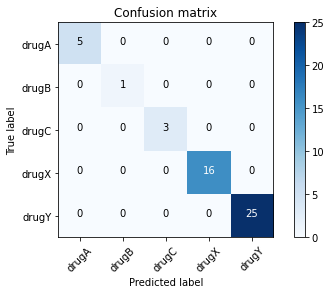

In [27]:
# Plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['drugA','drugB','drugC','drugX','drugY'],normalize= False,  title='Confusion matrix')